# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
#from statsmodels.stats.weightstats import ztest
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/TCummings03/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


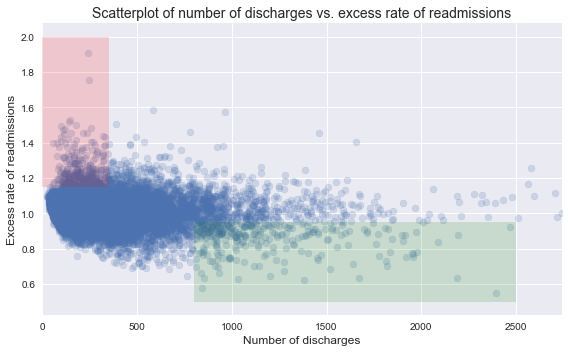

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
#Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions 
#for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital 
#with similar patients

In [6]:
#Rename to access df faster
df = clean_hospital_read_df.copy()

In [7]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


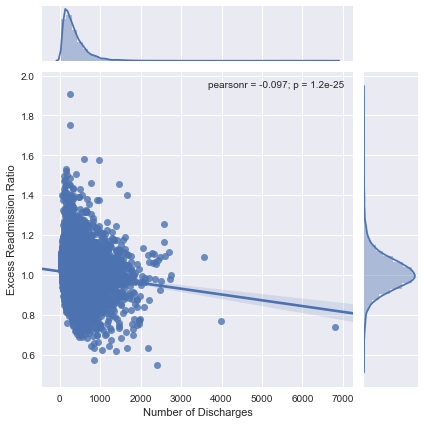

In [8]:
#Jointplot of Number of Discharges and Excess Readmission Ratio

sns.jointplot(data=df, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')

Not only can we tell from this graph that the number of discharges is not normally distributed, while it looks like the excess readmission ratio is, but we can also notice that the number of discharges has a large standard deviation.  We can confirm this by our earlier exploratory data analysis. 

In [9]:
#Correlation Matrix

df[['Number of Discharges','Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


Section A. I do not agree with the above analysis or recommendations for a number of reasons:

1) The initial observations suggest that there is a strong inverse relationship between the excess rate of readmissions and the number of discharges. However, this is misleading at best and incorrect at worst as we can see from the correlation matrix, which shows a weak correlation of -0.097398.  

2) The cutoff of number of discharges below 100 and above 1000 seems arbitrary, and there is no explanation for these ranges.  It seems to have been chosen to reinforce the above assertion of the negative relationship between the excess rate of readmissions and number of discharges. 

3) The observations also assert a "strong correlation" without running any tests. Furthermore, their initial misleading assertion means that their conclusion of smaller hospitals lacking the necessary resources is dubious.  In addition, the author leaps to causation from a hypothesis that rests on a weak correlation.  Regardless, correlation does not imply causation. 

4) The arbitrary number of hospitals labeled as "small capacity" at 300 discharges also does not include any justification. As we can tell from above, the median number of discharges is 280, which means more than 50% of the data is considered "small."

Section B. Statistical Analysis

The analysis above seems to suggest that there is a difference between the excess rate of readmissions for "small" (less than 300 discharges) and "large" (above 300 discharges) hospitals. Therefore, we will perform a hypothesis test, that tests the difference of means of the two groups.  This inquiry will be reflected in our hypothesis test. First, we must split the data into the two groups. 

In [34]:
#Split discharges by excess readmission ratio

small_hospitals = df.loc[df['Number of Discharges'] < 300]
large_hospitals = df.loc[df['Number of Discharges'] >= 300]

sh_ratio = small_hospitals['Excess Readmission Ratio']
lh_ratio = large_hospitals['Excess Readmission Ratio']

sh_ratio = sh_ratio.dropna()
lh_ratio = lh_ratio.dropna()

1-3. Hypothesis Test:

H0: There is no difference in the excess readamission ratio for small (<300) and large (>=300) hospitals
H1: There is a difference in the excess readamission ratio for small (<300) and large (>=300) hospitals
    
We are looking for the difference of means between the two groups with a 95% confidence interval

In [35]:
stats.ttest_ind(sh_ratio, lh_ratio)

Ttest_indResult(statistic=8.384446244560591, pvalue=5.6895380893335379e-17)

From the t-test above, we get a pvalue that is significantly less than our alpha of 0.01, which means we can reject the nully hypothesis that there is no difference in the excess readmission ratio for small (<300) and large (>=300) hospitals. This means we must accept the alternative hypothesis which states that there is a difference in the excess readamission ratio for small (<300) and large (>=300) hospitals. 

4. From the jointplot above, we can see that there is a correlation between Excess readmission ratio and number of discharges with a significant p-value of 1.2e^-25, which is signifcantly less than 0.01. However, the actual correlation coeffificent (-0.097) is so small that although our result may be statistically significant, it is not necessarily practically significant. It is not practically significant because the correlation is so weak that policy recommendations that arise from it may be misleading. 

As a result of this weak correlation, I would hesitate to require directives to consolidate the smaller hospitals and facilities to reduce the number of discharges. Instead, I think it would be more beneficial to allocate more resources to smaller hospitals to ensure that they are providing the adequate care their patients require.

5. 

Some of the advantages from the plot above:

    A) The red/green point out where the "good" and "bad" ranges are clearly
    
    B) You can quickly see the majority of discharges are between 0-1000

Some disadvantages:
    
    A) There is no regression line that makes it clearer if it's positive/negaitve correlation
    
    B) It isn't immediately clear from the plot whether or not there is a trend


A better way to show this data is done in the jointplot above, which includes a regression line showing the slight negative correlation and includes the pearson coefficient along with the p-value. The plot also includes a histogram of both x and y values, which gives us a better idea of how the data are spread out. The plot also helps us identify outliers a lot more clearly because we can see how they deviate from the trendline.